In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn 

# matplotlib 是著名的python画图工具，将matplotlib的图表嵌入到notebook中
%matplotlib inline
plt.style.use('ggplot')

df = pd.read_csv('results.csv')
df.head(6)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False


In [7]:
df_FIFA_all=df[df['tournament'].str.contains('FIFA',regex=True)]
df_FIFA_all.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1277,1930-07-13,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True
1278,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True
1279,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True
1280,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True


In [8]:
df_FIFA = df_FIFA_all[df_FIFA_all['tournament'] == 'FIFA World Cup']
df_FIFA.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1277,1930-07-13,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True
1278,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True
1279,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True
1280,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True


In [10]:
df_FIFA.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [11]:
df_FIFA.loc[:,'date']= pd.to_datetime(df_FIFA.loc[:,'date'])
df_FIFA.dtypes

d:\python27\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [12]:
df_FIFA['year']=df_FIFA['date'].dt.year
df_FIFA.head()

d:\python27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
1277,1930-07-13,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930
1278,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930
1279,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930
1280,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930


In [13]:
df_FIFA['diff_score']=df_FIFA['home_score']-df_FIFA['away_score']
df_FIFA.head()

d:\python27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,diff_score
1277,1930-07-13,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-3
1278,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930,3
1279,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930,-1
1280,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-2
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930,1


In [14]:
df_FIFA.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
year                   int64
diff_score             int64
dtype: object

In [16]:
df_FIFA['win_team']=''
df_FIFA.head()

d:\python27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,diff_score,win_team
1277,1930-07-13,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-3,
1278,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930,3,
1279,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930,-1,
1280,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-2,
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930,1,


In [17]:
df_FIFA.loc[df_FIFA['diff_score']>0,'win_team']= df_FIFA.loc[df_FIFA['diff_score']>0,'home_team']
df_FIFA.loc[df_FIFA['diff_score']<0,'win_team']=df_FIFA.loc[df_FIFA['diff_score']<0,'away_team']
df_FIFA.loc[df_FIFA['diff_score']==0,'win_team']='Draw'
df_FIFA.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,diff_score,win_team
1277,1930-07-13,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-3,USA
1278,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930,3,France
1279,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930,-1,Yugoslavia
1280,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-2,Romania
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930,1,Argentina


###  获胜国家

In [23]:
def find_win_team(df):
    winners =[]
    for r,row in df.iterrows():
        if row['home_score']>row['away_score']:
            winners.append(row['home_team'])
        elif row['home_score']<row['away_score']:
            winners.append(row['away_team'])
        else:
            winners.append('Draw')
    return winners

df_FIFA['winner']=find_win_team(df_FIFA)
df_FIFA.head()

d:\python27\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,diff_score,win_team,winner
1277,1930-07-13,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-3,USA,USA
1278,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930,3,France,France
1279,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930,-1,Yugoslavia,Yugoslavia
1280,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-2,Romania,Romania
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930,1,Argentina,Argentina


### 获胜场数最多的前20个国家

In [25]:
s = df_FIFA.groupby('win_team')['win_team'].count()
s.sort_values(ascending=False, inplace=True)
s

win_team
Draw                  186
Brazil                 70
Germany                66
Italy                  45
Argentina              42
Spain                  29
France                 28
Netherlands            27
England                26
Uruguay                20
Russia                 17
Sweden                 16
Hungary                15
Poland                 15
Belgium                14
Mexico                 14
Yugoslavia             14
Portugal               13
Austria                12
Switzerland            11
Czechoslovakia         11
Chile                  11
Romania                 8
USA                     8
Denmark                 8
Colombia                7
Paraguay                7
Croatia                 7
Nigeria                 5
Korea Republic          5
                     ... 
Cameroon                4
Ghana                   4
Japan                   4
Scotland                4
Peru                    4
Algeria                 3
Northern Ireland        3
Ser

In [26]:
s.drop(labels=['Draw'], inplace=True)
s

win_team
Brazil                70
Germany               66
Italy                 45
Argentina             42
Spain                 29
France                28
Netherlands           27
England               26
Uruguay               20
Russia                17
Sweden                16
Hungary               15
Poland                15
Belgium               14
Mexico                14
Yugoslavia            14
Portugal              13
Austria               12
Switzerland           11
Czechoslovakia        11
Chile                 11
Romania                8
USA                    8
Denmark                8
Colombia               7
Paraguay               7
Croatia                7
Nigeria                5
Korea Republic         5
Turkey                 5
                      ..
Cameroon               4
Ghana                  4
Japan                  4
Scotland               4
Peru                   4
Algeria                3
Northern Ireland       3
Serbia                 3
Bulgaria        

In [27]:
s.head(5)

win_team
Brazil       70
Germany      66
Italy        45
Argentina    42
Spain        29
Name: win_team, dtype: int64

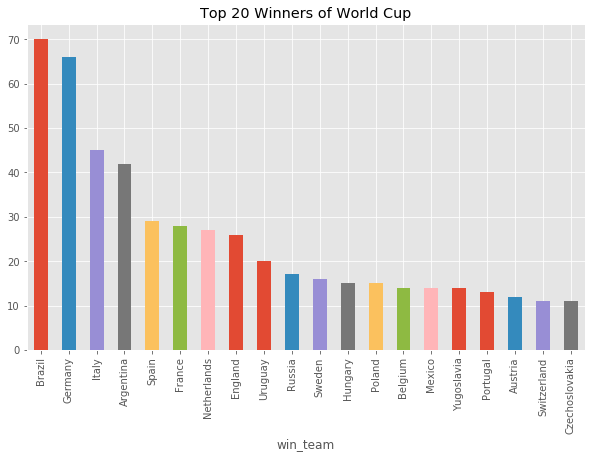

In [31]:
s.head(20).plot(kind='bar', figsize=(10,6), title='Top 20 Winners of World Cup')

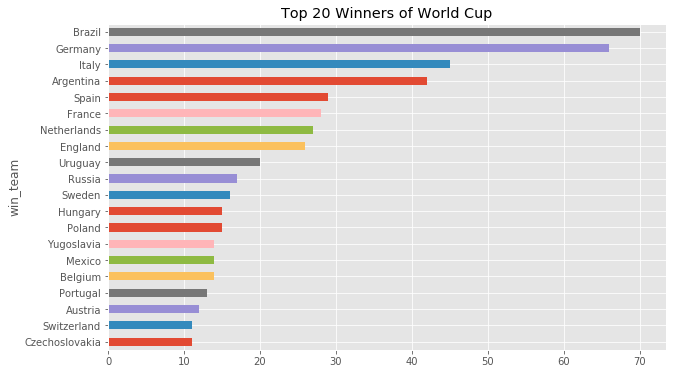

In [34]:
s.sort_values(ascending=True,inplace=True)
s.tail(20).plot(kind='barh', figsize=(10,6), title='Top 20 Winners of World Cup')

In [36]:
s.tail(5)

win_team
Spain        29
Argentina    42
Italy        45
Germany      66
Brazil       70
Name: win_team, dtype: int64

In [38]:
s_percentage = s/s.sum()
s_percentage

win_team
Cuba                  0.001538
Tunisia               0.001538
Slovenia              0.001538
Bosnia-Herzegovina    0.001538
Iran                  0.001538
Jamaica               0.001538
Czech Republic        0.001538
Korea DPR             0.001538
Wales                 0.001538
Slovakia              0.001538
Morocco               0.003077
German DR             0.003077
South Africa          0.003077
Australia             0.003077
Saudi Arabia          0.003077
Ireland               0.003077
Norway                0.003077
Ukraine               0.003077
Senegal               0.003077
Greece                0.003077
Ivory Coast           0.004615
Bulgaria              0.004615
Serbia                0.004615
Algeria               0.004615
Northern Ireland      0.004615
Ecuador               0.006154
Peru                  0.006154
Scotland              0.006154
Japan                 0.006154
Ghana                 0.006154
                        ...   
Korea Republic        0.007692

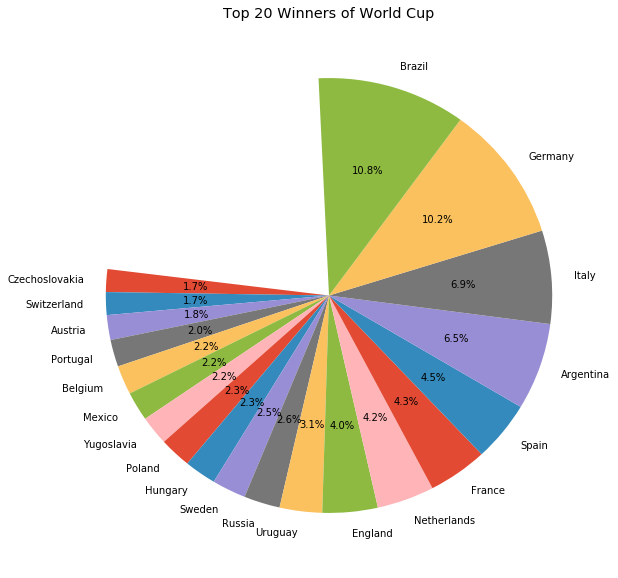

In [39]:
s_percentage.tail(20).plot(kind='pie', figsize=(10,10), autopct='%.1f%%', 
                           startangle=173, title='Top 20 Winners of World Cup', label='')

In [40]:
s.get('China',default='NA')

'NA'

In [41]:
s.get('Brazil',default='NA')

70

In [43]:
team_list =['Russia', 'Germany', 'Brazil', 'Portugal', 'Argentina', 'Belgium', 'Poland', 'France', 
             'Spain', 'Peru', 'Switzerland', 'England', 'Colombia', 'Mexico', 'Uruguay', 'Croatia',
            'Denmark', 'Iceland', 'Costa Rica', 'Sweden', 'Tunisia', 'Egypt', 'Senegal', 'Iran',
            'Serbia', 'Nigeria', 'Australia', 'Japan', 'Morocco', 'Panama', 'Korea Republic', 'Saudi Arabia']

df_top32= df_FIFA[(df_FIFA['home_team'].isin(team_list))&(df_FIFA['away_team'].isin(team_list))]
df_top32.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,diff_score,win_team,winner
1278,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930,3,France,France
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930,1,Argentina,Argentina
1286,1930-07-18,Uruguay,Peru,1,0,FIFA World Cup,Montevideo,Uruguay,False,1930,1,Uruguay,Uruguay
1287,1930-07-19,Argentina,Mexico,6,3,FIFA World Cup,Montevideo,Uruguay,True,1930,3,Argentina,Argentina
1296,1930-07-30,Uruguay,Argentina,4,2,FIFA World Cup,Montevideo,Uruguay,False,1930,2,Uruguay,Uruguay


### 32强赢球情况

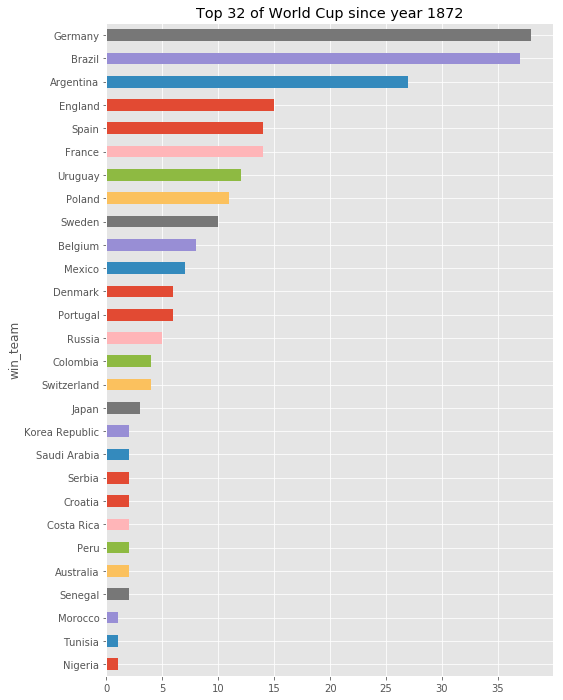

In [45]:
s_32=df_top32.groupby('win_team')['win_team'].count()
s_32.sort_values(ascending=False,inplace=True)
s_32.drop(labels=['Draw'], inplace=True)
s_32.sort_values(ascending=True,inplace=True)
s_32.plot(kind='barh', figsize=(8,12), title='Top 32 of World Cup since year 1872')

### 32强得分情况

In [48]:
df_score_home_32=df_top32[['home_team','home_score']]
column_update=['team','score']
df_score_home_32.columns=column_update
df_score_away_32=df_top32[['away_team','away_score']]
df_score_away_32.columns=column_update
df_score_32 = pd.concat([df_score_home_32,df_score_away_32], ignore_index=True)
s_score_32=df_score_32.groupby('team')['score'].sum()
s_score_32.sort_values(ascending=False,inplace=True)
s_score_32

team
Germany           132
Brazil            121
Argentina          76
France             57
England            53
Sweden             45
Spain              45
Uruguay            39
Belgium            37
Mexico             31
Poland             30
Russia             27
Denmark            23
Portugal           17
Korea Republic     17
Colombia           16
Switzerland        16
Japan              11
Peru               11
Nigeria            10
Costa Rica         10
Croatia             9
Tunisia             7
Australia           7
Senegal             7
Saudi Arabia        6
Morocco             5
Serbia              5
Iran                2
Egypt               0
Name: score, dtype: int64

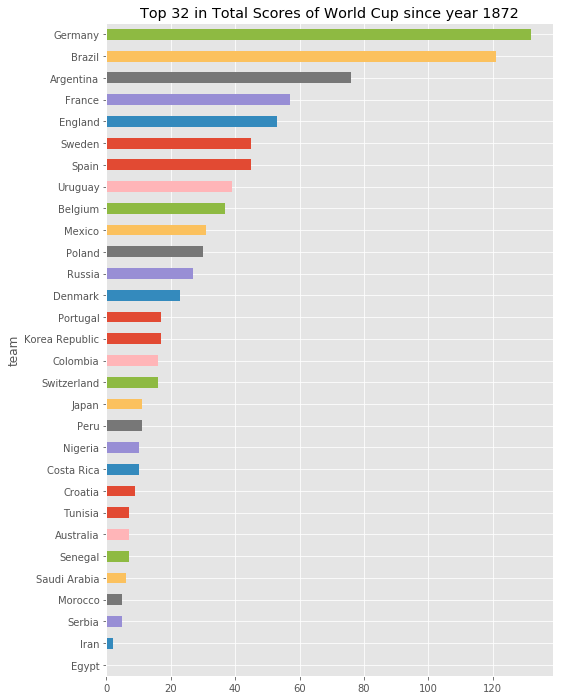

In [49]:
s_score_32.sort_values(ascending=True, inplace=True)
s_score_32.plot(kind='barh', figsize=(8,12), title='Top 32 in Total Scores of World Cup since year 1872')

### 32强最近10届世界杯的表现数据

In [50]:
df_top32_10=df_top32[df_top32['year']>=1978]
df_top32_10.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,diff_score,win_team,winner
10423,1978-06-01,Germany,Poland,0,0,FIFA World Cup,Buenos Aires,Argentina,True,1978,0,Draw,Draw
10426,1978-06-02,Mexico,Tunisia,1,3,FIFA World Cup,Rosario,Argentina,True,1978,-2,Tunisia,Tunisia
10428,1978-06-03,Brazil,Sweden,1,1,FIFA World Cup,Mar del Plata,Argentina,True,1978,0,Draw,Draw
10431,1978-06-06,Argentina,France,2,1,FIFA World Cup,Buenos Aires,Argentina,False,1978,1,Argentina,Argentina
10432,1978-06-06,Germany,Mexico,6,0,FIFA World Cup,Córdoba,Argentina,True,1978,6,Germany,Germany
